
# Vertical Institute Data Science Bootcamp
# Capstone Project: BTC Price Prediction Model Using Linear Regression



### Project Objectives:

- Apply lessopns learned to a real world problem
- Use and standardize Lifecycle approach to Data Science problems.
- Baseline a prediction model for further iterations.

<img src="img/Data Science LifeCycle.png">
Source: https://www.sudeep.co/data-science/2018/02/09/Understanding-the-Data-Science-Lifecycle.html

# Background

The cryptocurrency Bitcoin(BTC) debut in 2008 by Satoshi Nakamoto, and began use in 2009, released as open-source software.

Notably, high volatility is a key feature for Bitcoin, with fluctuations of at least 60% annually since 2015. Severe sell-offs is regular in the crypto market, crashing roughly 80% from 2017 highs but rebounded to new all-time highs in 2020. Recently, BTC reached an all-time high of over USD 65000 in November 2021 due to news of the launch of a Bitcoin ETF in the United States. However, in 2022, BTC has suffered a crash of more than 70%, dropping as low as USD 17000 in June 2022. Since then, Bitcoin prices have rebounded to above USD 22000.

The current 2022 bear market is largely due to the crisis of algorithmic stablecoins — namely the TerraUSD Classic (USTC) which had managed to become the third-largest stablecoin. USTC, lost its dollar peg in May and this de-pegging triggered a massive panic over broader crypto markets, as well as margin calls. 

Next, the collapse of Terra triggerred a domino effect on the rest of the crypto market due to massive liquidations and uncertainty regarding cryptocurrency lending, with a number of crypto lenders like Celsius having to suspend withdrawals due to their inability to maintain liquidity amidst brutal market conditions.

Due to this sell down, it is reported that 80,000 Bitcoin millionaires were wiped out in the great crypto crash of 2022, with the number of Bitcoin millionaires declining by more than 75% since November 2021.


# 01 - Problem Statement

The feature of high volatility in crypto markets creates good trading conditions. Therefore, we would like to see if Machine Learning can be applied to help predict future prices.


In [132]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [133]:

%%html
<style>
table {float:left}
</style>

# 02 - Data Mining

In this project, the data comes prepared from Kaggle sources. In real world, data gathering would involve data scraping and mining from the web, and so on.

In [134]:
#data source: https://www.kaggle.com/datasets/himanshunakrani/cryptocurrencies-dataset/download?datasetVersionNumber=4
#This dataset contains the historical prices and volume of 4 cryptocurrencies(BTC,BNB,ETH,USDT) from November 9, 2017 to August 4, 2022. 
df = pd.read_csv('crypto prices.csv', parse_dates=['Date'])   # Parse to Python datetime format
df.head()


,Unnamed: 0,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,0,2017-11-09,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
1,1,2017-11-10,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
2,2,2017-11-11,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
3,3,2017-11-12,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
4,4,2017-11-13,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984


# 03 - Data Cleaning

This step is to fix inconsistencies, extract and transform raw data to a format that our models can consume.

In [135]:
# quick examine the data 
df.head() 
df.sample(3)
df.info() # observe Non-Null Count for missing values
df.describe()

# Examine the default index, datatypes, and shape.
df.index
df.dtypes
df.shape

,Unnamed: 0,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
0,0,2017-11-09,1.99077,19192200,7143.580078,3226249984,1.00818,358188000,320.884003,893249984
1,1,2017-11-10,1.79684,11155000,6618.140137,5208249856,1.00601,756446016,299.252991,885985984
2,2,2017-11-11,1.67047,8178150,6357.600098,4908680192,1.00899,746227968,314.681000,842300992
3,3,2017-11-12,1.51969,15298700,5950.069824,8957349888,1.01247,1466060032,307.907990,1613479936
4,4,2017-11-13,1.68662,12238800,6559.490234,6263249920,1.00935,767884032,316.716003,1041889984


,Unnamed: 0,Date,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
1537,1537,2022-01-24,371.368958,3210871602,36654.328125,41856658597,1.000439,88845381041,2440.352295,28220804648
1012,1012,2020-08-17,23.510103,264606385,12254.402344,28227687027,1.000111,43047212745,429.531250,13227089410
669,669,2019-09-09,22.287390,155543678,10334.974609,17595943368,1.002489,20257637729,181.149460,7232938985


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1730 non-null   int64         
 1   Date              1730 non-null   datetime64[ns]
 2   Adj Close (BNB)   1730 non-null   float64       
 3   Volume (BNB)      1730 non-null   int64         
 4   Adj Close (BTC)   1730 non-null   float64       
 5   Volume (BTC)      1730 non-null   int64         
 6   Adj Close (USDT)  1730 non-null   float64       
 7   Volume (USDT)     1730 non-null   int64         
 8   Adj Close (ETH)   1730 non-null   float64       
 9   Volume (ETH)      1730 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 135.3 KB


,Unnamed: 0,Adj Close (BNB),Volume (BNB),Adj Close (BTC),Volume (BTC),Adj Close (USDT),Volume (USDT),Adj Close (ETH),Volume (ETH)
count,1730.0000,1730.000000,1.730000e+03,1730.000000,1.730000e+03,1730.000000,1.730000e+03,1730.000000,1.730000e+03
mean,864.5000,134.960777,9.647885e+08,20191.519348,2.570080e+10,1.001717,4.085393e+10,1105.603148,1.288480e+10
std,499.5523,185.725539,1.486405e+09,17507.045641,2.003526e+10,0.005928,3.912941e+10,1233.514214,1.104728e+10
min,0.0000,1.510360,9.284000e+03,3236.761719,2.923670e+09,0.966644,3.581880e+08,84.308296,6.217330e+08
25%,432.2500,13.670646,1.177502e+08,7457.858887,9.718123e+09,0.999968,4.705288e+09,203.758255,3.844413e+09
50%,864.5000,22.234484,3.079566e+08,10330.514649,2.313310e+10,1.000601,3.348729e+10,436.047501,1.047600e+10
75%,1296.7500,288.047844,1.467549e+09,35538.384766,3.518178e+10,1.002838,6.087353e+10,1828.478180,1.823330e+10
max,1729.0000,675.684082,1.798295e+10,67566.828125,3.509679e+11,1.077880,2.790675e+11,4812.087402,8.448291e+10


RangeIndex(start=0, stop=1730, step=1)

Unnamed: 0                   int64
Date                datetime64[ns]
Adj Close (BNB)            float64
Volume (BNB)                 int64
Adj Close (BTC)            float64
Volume (BTC)                 int64
Adj Close (USDT)           float64
Volume (USDT)                int64
Adj Close (ETH)            float64
Volume (ETH)                 int64
dtype: object

(1730, 10)

In [136]:
# Drop irrelevant columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # drop Unnamed col
df = df.loc[:, ~df.columns.str.contains('BNB')] # drop Unnamed BNB cols
df = df.loc[:, ~df.columns.str.contains('USDT')] # drop Unnamed USDT cols
df = df.loc[:, ~df.columns.str.contains('ETH')] # drop Unnamed ETH cols
df.head()

,Date,Adj Close (BTC),Volume (BTC)
0,2017-11-09,7143.580078,3226249984
1,2017-11-10,6618.140137,5208249856
2,2017-11-11,6357.600098,4908680192
3,2017-11-12,5950.069824,8957349888
4,2017-11-13,6559.490234,6263249920


In [137]:
# Remove duplicates
print('Duplicates?',df.duplicated().any()) # Check
df.drop_duplicates() # Remove if duplicates found.

Duplicates? False


,Date,Adj Close (BTC),Volume (BTC)
0,2017-11-09,7143.580078,3226249984
1,2017-11-10,6618.140137,5208249856
2,2017-11-11,6357.600098,4908680192
3,2017-11-12,5950.069824,8957349888
4,2017-11-13,6559.490234,6263249920
...,...,...,...
1725,2022-07-31,23336.896484,23553591896
1726,2022-08-01,23314.199219,25849159141
1727,2022-08-02,22978.117188,28389250717
1728,2022-08-03,22846.507813,26288169966


In [138]:
# Fix missing data
df.isnull().sum() # Print null count
df.dropna(how = 'all') # Drop all nulls in this case,  
# df.interpolate() # Can consider this method as well, but price data usually do not have gaps

Date               0
Adj Close (BTC)    0
Volume (BTC)       0
dtype: int64

,Date,Adj Close (BTC),Volume (BTC)
0,2017-11-09,7143.580078,3226249984
1,2017-11-10,6618.140137,5208249856
2,2017-11-11,6357.600098,4908680192
3,2017-11-12,5950.069824,8957349888
4,2017-11-13,6559.490234,6263249920
...,...,...,...
1725,2022-07-31,23336.896484,23553591896
1726,2022-08-01,23314.199219,25849159141
1727,2022-08-02,22978.117188,28389250717
1728,2022-08-03,22846.507813,26288169966


In [139]:
# Set the datetime as the index 
df.set_index('Date', drop=True, inplace=True) 
df.head()

,Adj Close (BTC),Volume (BTC)
Date,,
2017-11-09,7143.580078,3226249984
2017-11-10,6618.140137,5208249856
2017-11-11,6357.600098,4908680192
2017-11-12,5950.069824,8957349888
2017-11-13,6559.490234,6263249920


In [140]:
# Rename columns
df.rename(columns={'Adj Close (BTC)': 'Close', 'Volume (BTC)': 'Volume'}, inplace=True)
df.head()

,Close,Volume
Date,,
2017-11-09,7143.580078,3226249984
2017-11-10,6618.140137,5208249856
2017-11-11,6357.600098,4908680192
2017-11-12,5950.069824,8957349888
2017-11-13,6559.490234,6263249920


# 04 - Data Exploration

With the data cleaned, we can do some exploration.

Text(0.5, 1.0, 'Historical prices of Bitcoin(BTC) from 09-11-2017 to 04-08-2022')

<BarContainer object of 1730 artists>

Text(0.5, -0.6, '\nTrading Volume')

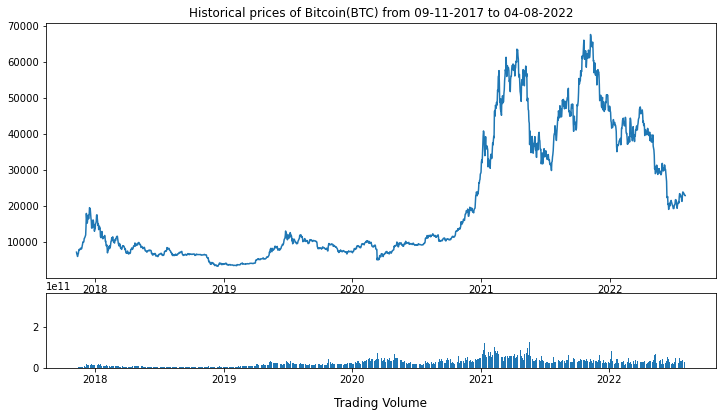

In [141]:
# Draw a chart
price_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
price_plt.plot(df.index, df["Close"])
plt.title('Historical prices of Bitcoin(BTC) from 09-11-2017 to 04-08-2022') #from November 9, 2017 to August 4, 2022
vol_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
vol_plt.bar(df.index, df['Volume'])
plt.title('\nTrading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

In [142]:
# Show some summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1730 entries, 2017-11-09 to 2022-08-04
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1730 non-null   float64
 1   Volume  1730 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.5 KB
None
              Close        Volume
count   1730.000000  1.730000e+03
mean   20191.519348  2.570080e+10
std    17507.045641  2.003526e+10
min     3236.761719  2.923670e+09
25%     7457.858887  9.718123e+09
50%    10330.514649  2.313310e+10
75%    35538.384766  3.518178e+10
max    67566.828125  3.509679e+11


# 05 - Feature Engineering

This step is to select important features, but in this case, we will try to model 'NextClose' which is the closing price tomorrow.

In [143]:
forecast_period = 1 # Predict 1 day forward
df['NextClose'] = df[['Close']].shift(-forecast_period)
df
df.dropna(inplace=True) # Get rid of the rows that have NaNs

# Decide which features to use for our regression. 
features_to_fit = ['Close']

# Create our target and labels
X = df[features_to_fit]
y = df['NextClose']
   
# Create training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Test set
print(X_test.describe())

# Training set
print(X_train.describe())

,Close,Volume,NextClose
Date,,,
2017-11-09,7143.580078,3226249984,6618.140137
2017-11-10,6618.140137,5208249856,6357.600098
2017-11-11,6357.600098,4908680192,5950.069824
2017-11-12,5950.069824,8957349888,6559.490234
2017-11-13,6559.490234,6263249920,6635.750000
...,...,...,...
2022-07-31,23336.896484,23553591896,23314.199219
2022-08-01,23314.199219,25849159141,22978.117188
2022-08-02,22978.117188,28389250717,22846.507813


              Close
count    260.000000
mean   19774.824819
std    17287.150565
min     3252.839111
25%     7569.239502
50%    10286.120606
75%    34111.830078
max    65466.839844
              Close
count   1469.000000
mean   20263.455136
std    17556.290161
min     3236.761719
25%     7422.652832
50%    10334.974609
75%    35698.296875
max    67566.828125


# 06 - Predictive Modeling

Using LinearRegression as a first model, and use it to train and predict.
Our model will try to predict next day closing(forecast_period = 1)

## Model A: Using Closing Price

In [144]:
# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)
print("NextClose:",(y_pred[-1]))

# Evaluate
print("Performance (R^2): ", model.score(X_train, y_train))
print("Confidence: ", model.score(X_test,y_test))

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout some metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


LinearRegression()

NextClose: 36882.35515938067
Performance (R^2):  0.996486543493496
Confidence:  0.9965160747940826
Model Coefficients: [0.9971623]
Mean Absolute Error: 576.5769006340371
Coefficient of Determination: 0.9965160747940826


This model using just the feature closing price, has the following results:  
- Performance and Confidence looks very good.
- Metrics looks good.

## Model B: Using Volume

Next, we try to predict next day closing, using Volume as the X(independent) variables. 
The workings are combined together.

In [145]:
forecast_period = 1 # Predict 1 day forward
df['NextClose'] = df[['Close']].shift(-forecast_period)
df
df.dropna(inplace=True) # Get rid of the rows that have NaNs

# Decide which features to use for our regression. 
features_to_fit = ['Volume']

# Create our target and labels
X = df[features_to_fit]
y = df['NextClose']
   
# Create training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Test set
print(X_test.describe())

# Training set
print(X_train.describe())

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)
print("NextClose:",(y_pred[-1]))

# Evaluate
print("Performance (R^2): ", model.score(X_train, y_train))
print("Confidence: ", model.score(X_test,y_test))

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout some metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

,Close,Volume,NextClose
Date,,,
2017-11-09,7143.580078,3226249984,6618.140137
2017-11-10,6618.140137,5208249856,6357.600098
2017-11-11,6357.600098,4908680192,5950.069824
2017-11-12,5950.069824,8957349888,6559.490234
2017-11-13,6559.490234,6263249920,6635.750000
...,...,...,...
2022-07-30,23656.207031,28148218301,23336.896484
2022-07-31,23336.896484,23553591896,23314.199219
2022-08-01,23314.199219,25849159141,22978.117188


             Volume
count  2.600000e+02
mean   2.447146e+10
std    1.615247e+10
min    3.197110e+09
25%    9.879702e+09
50%    2.388585e+10
75%    3.444133e+10
max    7.866524e+10
             Volume
count  1.468000e+03
mean   2.591874e+10
std    2.065729e+10
min    2.923670e+09
25%    9.657196e+09
50%    2.289950e+10
75%    3.535217e+10
max    3.509679e+11


LinearRegression()

NextClose: 12644.997438220842
Performance (R^2):  0.33743888782261333
Confidence:  0.2532948539417734
Model Coefficients: [5.00626752e-07]
Mean Absolute Error: 10843.361329876709
Coefficient of Determination: 0.2532948539417734


This model using just the feature Volume, has the following results:

Performance and Confidence is low.
Metrics looks low.

## Model C: Using Closing Price and Volume

Next, we try to predict next day closing, by combining Closing Price and Volume as the X(independent) variables. 


In [146]:
forecast_period = 1 # Predict 1 day forward
df['NextClose'] = df[['Close']].shift(-forecast_period)
df
df.dropna(inplace=True) # Get rid of the rows that have NaNs

# Decide which features to use for our regression. 
features_to_fit = ['Close','Volume']

# Create our target and labels
X = df[features_to_fit]
y = df['NextClose']
   
# Create training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Test set
print(X_test.describe())

# Training set
print(X_train.describe())

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)
print("NextClose:",(y_pred[-1]))

# Evaluate
print("Performance (R^2): ", model.score(X_train, y_train))
print("Confidence: ", model.score(X_test,y_test))

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout some metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

,Close,Volume,NextClose
Date,,,
2017-11-09,7143.580078,3226249984,6618.140137
2017-11-10,6618.140137,5208249856,6357.600098
2017-11-11,6357.600098,4908680192,5950.069824
2017-11-12,5950.069824,8957349888,6559.490234
2017-11-13,6559.490234,6263249920,6635.750000
...,...,...,...
2022-07-29,23804.632813,35887249746,23656.207031
2022-07-30,23656.207031,28148218301,23336.896484
2022-07-31,23336.896484,23553591896,23314.199219


              Close        Volume
count    260.000000  2.600000e+02
mean   19457.103599  2.422055e+10
std    17451.258873  1.796261e+10
min     3236.761719  2.923670e+09
25%     7233.581909  8.848168e+09
50%     9826.155762  2.033131e+10
75%    34492.888672  3.413716e+10
max    61593.949219  9.180985e+10
              Close        Volume
count   1467.000000  1.467000e+03
mean   20316.154388  2.596152e+10
std    17537.140977  2.039506e+10
min     3242.484863  3.104020e+09
25%     7513.029541  9.882192e+09
50%    10366.700195  2.350963e+10
75%    35559.306640  3.536046e+10
max    67566.828125  3.509679e+11


LinearRegression()

NextClose: 8890.340655981236
Performance (R^2):  0.9963477702034921
Confidence:  0.9973288635865947
Model Coefficients: [9.96174371e-01 2.39231430e-09]
Mean Absolute Error: 517.1988997516588
Coefficient of Determination: 0.9973288635865947


This model using just the feature Volume, has the following results:

Performance and Confidence is good.
Metrics looks good.

## Comparison of the different models

| **Model**           | **R^2** | **Confidence** |  **MAE** |
|---------------------|---------|----------------|----------|
| **A(Close)**        | 0.9962  | 0.9976         | 563.08   |
| **B(Volume)**       | 0.3274  | 0.3214         | 9843.25  |
| **C(Close,Volume)** | 0.9965  | 0.9963         | 572.53   |




Based on MAE and R^2 value, it seems Model A(Close) is the best:
- insignificant difference in values compared to the next best, model C(Close,Volume)
- uses the least to explain the most.

Also, it is intuitive/logical as the volume may have come from a (few) decentralised exchanges, and is not the total actual volume. As such, the data quality of volume may just represent 'captured' volume rather than total volume.

# 07 - Data Visualization

Here, we communicate the best findings using charts.

,Close,Volume,NextClose
Date,,,
2022-07-28,23843.886719,40212386158,23804.632813
2022-07-29,23804.632813,35887249746,23656.207031
2022-07-30,23656.207031,28148218301,23336.896484
2022-07-31,23336.896484,23553591896,23314.199219
2022-08-01,23314.199219,25849159141,22978.117188


<AxesSubplot:xlabel='Date'>

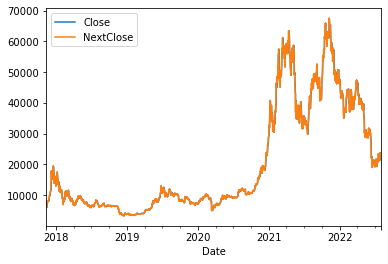

In [147]:
df.tail()
df[['Close', 'NextClose']].plot()

Plotting Close and NextClose shows that the predicted value tracks the actual value very well.

# Conclusion

The modeling looks promising but can be made more robust by:
- researching other independent variables, such as time of day, opening/closing hour, and so on.
- expanding comparison or integration with other models like LSTM,etc.
- expanding to other assets and see if we have similar results.
- research whether sudden deviations like price spikes are related to sudden news, and hence it could be useful to add other Machine Learning tools like Sentiment Analysis.

Also, the process can be further refined and standardized. 

In real use, friction like slippages, execution latencies, liquidity have to be taken into consideration.